# FIFA Player Data - 22

  - Robert Yonce
  - Started 4/5/23
  - Updated 4/13/23

## Imports

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Models
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Classification Metrics
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, 
                            classification_report, ConfusionMatrixDisplay)

# Set global scikit-learn configuration 
from sklearn import set_config
set_config(display='diagram')

## Data Import

In [2]:
# Import the data

df = pd.read_csv('docs/players_22.csv')
df.head()

/var/folders/vk/t9rtndzd5373ql2yjk1qympr0000gn/T/ipykernel_5637/617215295.py:3: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('docs/players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


## Filters for Visuals

In [ ]:
# New categories for Age

bins = [16, 21, 25, 33, np.inf]
names = np.array(['young', 'prime', 'experienced', 'veteran'])
df['age_cat'] = names[np.searchsorted(bins, df['age'])-1]

In [ ]:
# To see value counts

df['age_cat'].value_counts()

In [ ]:
# Top 22 players in FIFA 22

top22 = df['overall'] >= 89
top22.head(23)

In [ ]:
# Using Dictionary for mapping
dict_map = {'Normal (170-185)':'normal','Normal (185+)':'normal','Normal (170-)':'normal',
            'Lean (170-185)':'lean', 'Lean (185+)': 'lean', 'Lean (170-)': 'lean', 
           'Stocky (170-185)':'stocky','Stocky (185+)':'stocky','Stocky (170-)':'stocky', 
            'Unique': 'unique'}
df['body_type'] = df['body_type'].map(dict_map)

df['body_type'].value_counts()

## Visuals

In [ ]:
# Wage, Overall and Body Type

ax = sns.scatterplot(data = df, x = 'wage_eur', y = 'overall', hue = 'body_type')

ax.set(title = "FIFA Players")
ax.set(ylabel = "Overall FIFA Rating")
ax.set(xlabel = 'Wage in Euros');

### Plot Insight: 
- You can see most of the unique body types are highest in wages.

- Normal is closer to the lower amount end except for a couple near the high amount

In [ ]:
# Wage, Overall and Age Category

ax = sns.scatterplot(data = df, x = 'wage_eur', y = 'overall', hue = 'age_cat')

ax.set(title = "FIFA Players")
ax.set(ylabel = "Overall FIFA Rating")
ax.set(xlabel = 'Wage in Euros');

### Plot Insight: 
- You can see that the experienced players are the ones with the higher wages and 1 veteran. 

- This makes sense as most players get their high contract near the end of their prime years heading into experienced years.

- Young are mostly near the lower amount of wages except for a couple creeping near the middle

In [ ]:
# Height and Heading Accuracy

ax = sns.scatterplot(data = df, x = 'height_cm', y = 'attacking_heading_accuracy', hue = 'body_type')

ax.set(title = "FIFA Players")
ax.set(ylabel = "Player's Heading Accuracy")
ax.set(xlabel = "Player's Height")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1));

### Plot Insight: 
- Very interesting to see 2 clusters/groups here. 

- My take would be the bottom cluster is the goalies or defenders that don't press up on corners. The top cluster would be your normal attackers on offense and corners. 

In [ ]:
# Players Passing and Overall

ax = sns.scatterplot(data = df, x = 'overall', y = 'passing', hue = 'age_cat',)

ax.set(title = "FIFA Players")
ax.set(ylabel = "Player's Passing")
ax.set(xlabel = 'Overall FIFA Rating');

### Plot Insight: 
- This shows shows there is a decent correlation of passing vs overall. 

- Also can see how age impacts passing.

In [ ]:
# Players Shooting and Overall

ax = sns.scatterplot(data = df, x = 'overall', y = 'shooting', hue = 'preferred_foot',)

ax.set(title = "FIFA Players")
ax.set(ylabel = "Player's Shooting")
ax.set(xlabel = 'Overall FIFA Rating');

### Plot Insight: 
- Not the correlation I was thinking that would be associated with shooting and overall.

- Can see the difference between left and right shooters. Would be interesting to see the top percentage between left and right as right just has more overall players. 

In [ ]:
# Top Players and Age

ax = sns.scatterplot(data = df[top22], x = 'age', y = 'overall', hue = 'body_type',)

ax.set(title = "FIFA Top 22 Players")
ax.set(ylabel = "Overall FIFA Rating")
ax.set(xlabel = 'Age');

### Plot Insight: 
- This shows the top 22 players on FIFA are mostly unique body types.

- Also get a view how age is just a number when it comes to the top players!

- The two outliers are K. Benzema (Normal) and J. Kimmich (Lean). 

In [ ]:
# Histogram plot with Seaborn

ax = sns.histplot(data = df, x = 'overall', hue = 'preferred_foot')

ax.set(title = "Players' Rating")
ax.set(xlabel = 'Overall FIFA Rating for Players')

median = df['overall'].median()

ax.axvline(median, color = 'b', ls = '--', 
            label = f'Median Rate = {median}');

### Plot Insight: 
- Can see pretty even distribution of players overall rankings in FIFA with a mean around 66 overall

In [ ]:
# Count plot with Seaborn

ax = sns.countplot(data = df, y = 'age', order = df['age'].value_counts().index);

ax.set(title = "FIFA Players based on Age")
ax.set(ylabel = "Player's Age")
ax.set(xlabel = 'Count');

### Plot Insight: 
- Great view of age distribution of players in the game. 

In [ ]:
# Count plot with Seaborn

ax = sns.countplot(data = df, y = 'work_rate');

ax.set(title = "Player's Work Rate Offense/Defense")
ax.set(ylabel = "Player's Work Rate")
ax.set(xlabel = 'Count');

### Plot Insight: 
- Just wanted to see how many players classified in each category as this is a key trait in the game depending on which position you are trying to buy for your team. 

## Data Clean Up

### Dropping Columns

In [ ]:
# Re-did DF so I have original columns

df = pd.read_csv('docs/players_22.csv')
df.head()

In [3]:
df = df.drop(columns = ['sofifa_id', 'player_url', 'short_name','long_name', 'player_face_url', 'club_logo_url', 'club_flag_url', 
                        'nation_logo_url', 'nation_flag_url', 'league_name', 'league_level', 'club_jersey_number', 
                        'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 
                        'nationality_name', 'nation_team_id', 'nation_jersey_number', 'real_face', 'release_clause_eur',
                        'dob', 'club_team_id', 'club_name', 'mentality_composure', 'nation_position', 'player_tags', 
                        'player_traits', 'player_positions', 'club_position'])

In [5]:
df.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,93,93,78000000.0,320000.0,34,170,72,Left,4,4,5,Medium/Low,Unique,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,92,92,119500000.0,270000.0,32,185,81,Right,4,4,5,High/Medium,Unique,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,91,91,45000000.0,270000.0,36,187,83,Right,4,5,5,High/Low,Unique,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,91,91,129000000.0,270000.0,29,175,68,Right,5,5,5,High/Medium,Unique,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,91,91,125500000.0,350000.0,30,181,70,Right,5,4,4,High/High,Unique,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,68,65,53,15,13,5,10,13,NaN,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


### Removing Duplicates

In [6]:
# Check for Duplicates

print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### Missing Values

In [7]:
# Display the counts of missing values

print(f'There are {df.isna().sum().sum()} missing values.')

print(df.isna().sum())

There are 30034 missing values.
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
height_cm                          0
weight_kg                          0
preferred_foot                     0
weak_foot                          0
skill_moves                        0
international_reputation           0
work_rate                          0
body_type                          0
pace                            2132
shooting                        2132
passing                         2132
dribbling                       2132
defending                       2132
physic                          2132
attacking_crossing                 0
attacking_finishing                0
attacking_heading_accuracy         0
attacking_short_passing            0
attacking_volleys                  0
skill_dribbling                    0
skill_curve                        0
skill_

In [8]:
# Replace values I know to be 0

df['pace'].fillna(value = 0, inplace = True)
df['shooting'].fillna(value = 0, inplace = True)
df['passing'].fillna(value = 0, inplace = True)
df['dribbling'].fillna(value = 0, inplace = True)
df['defending'].fillna(value = 0, inplace = True)
df['physic'].fillna(value = 0, inplace = True)
df['goalkeeping_speed'].fillna(value = 0, inplace = True)

In [9]:
# Display the counts of missing values

print(f'There are {df.isna().sum().sum()} missing values.')

print(df.isna().sum())

There are 135 missing values.
overall                         0
potential                       0
value_eur                      74
wage_eur                       61
age                             0
height_cm                       0
weight_kg                       0
preferred_foot                  0
weak_foot                       0
skill_moves                     0
international_reputation        0
work_rate                       0
body_type                       0
pace                            0
shooting                        0
passing                         0
dribbling                       0
defending                       0
physic                          0
attacking_crossing              0
attacking_finishing             0
attacking_heading_accuracy      0
attacking_short_passing         0
attacking_volleys               0
skill_dribbling                 0
skill_curve                     0
skill_fk_accuracy               0
skill_long_passing              0
skill_ball_control

In [10]:
# Drop the final missing values as low percentages of total 

df.dropna(inplace = True)

In [11]:
# Display the counts of missing values

print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


## Feature Engineering

### Splitting Columns

In [12]:
# Splitting into Overall

df[['o_ls','p_ls']] = df['ls'].str.split('\+|\-', expand=True).astype('float')

df[['o_st','p_st']] = df['st'].str.split('\+|\-', expand=True).astype('float')

df[['o_rs','p_rs']] = df['rs'].str.split('\+|\-', expand=True).astype('float')

df[['o_lw','p_lw']] = df['lw'].str.split('\+|\-', expand=True).astype('float')

df[['o_lf','p_lf']] = df['lf'].str.split('\+|\-', expand=True).astype('float')

df[['o_cf','p_cf']] = df['cf'].str.split('\+|\-', expand=True).astype('float')

df[['o_rf','p_rf']] = df['rf'].str.split('\+|\-', expand=True).astype('float')

df[['o_rw','p_rw']] = df['rw'].str.split('\+|\-', expand=True).astype('float')

df[['o_lam','p_lam']] = df['lam'].str.split('\+|\-', expand=True).astype('float')

df[['o_cam','p_cam']] = df['cam'].str.split('\+|\-', expand=True).astype('float')

df[['o_ram','p_ram']] = df['ram'].str.split('\+|\-', expand=True).astype('float')

df[['o_lm','p_lm']] = df['lm'].str.split('\+|\-', expand=True).astype('float')

df[['o_lcm','p_lcm']] = df['lcm'].str.split('\+|\-', expand=True).astype('float')

df[['o_cm','p_cm']] = df['cm'].str.split('\+|\-', expand=True).astype('float')

df[['o_rcm','p_rcm']] = df['rcm'].str.split('\+|\-', expand=True).astype('float')

df[['o_rm','p_rm']] = df['rm'].str.split('\+|\-', expand=True).astype('float')

df[['o_lwb','p_lwb']] = df['lwb'].str.split('\+|\-', expand=True).astype('float')

df[['o_ldm','p_ldm']] = df['ldm'].str.split('\+|\-', expand=True).astype('float')

df[['o_cdm','p_cdm']] = df['cdm'].str.split('\+|\-', expand=True).astype('float')

df[['o_rdm','p_rdm']] = df['rdm'].str.split('\+|\-', expand=True).astype('float')

df[['o_rwb','p_rwb']] = df['rwb'].str.split('\+|\-', expand=True).astype('float')

df[['o_lb','p_lb']] = df['lb'].str.split('\+|\-', expand=True).astype('float')

df[['o_lcb','p_lcb']] = df['lcb'].str.split('\+|\-', expand=True).astype('float')

df[['o_cb','p_cb']] = df['cb'].str.split('\+|\-', expand=True).astype('float')

df[['o_rcb','p_rcb']] = df['rcb'].str.split('\+|\-', expand=True).astype('float')

df[['o_rb','p_rb']] = df['rb'].str.split('\+|\-', expand=True).astype('float')

df[['o_gk','p_gk']] = df['gk'].str.split('\+|\-', expand=True).astype('float')

### Dropping More Columns

In [13]:
# Unneccessary columns now

df = df.drop(columns = ['ls','p_ls','st','p_st','rs','p_rs','lw','p_lw','lf','p_lf',
                        'cf','p_cf','rf','p_rf','rw','p_rw','lam','p_lam','cam','p_cam',
                        'ram','p_ram','lm','p_lm','lcm','p_lcm','cm','p_cm',
                        'rcm','p_rcm','rm','p_rm','lwb','p_lwb','ldm','p_ldm',
                        'cdm','p_cdm','rdm','p_rdm','rwb','p_rwb','lb','p_lb',
                        'lcb','p_lcb','cb','p_cb','rcb','p_rcb','rb','p_rb',
                        'gk','p_gk','potential'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19165 entries, 0 to 19238
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      19165 non-null  int64  
 1   value_eur                    19165 non-null  float64
 2   wage_eur                     19165 non-null  float64
 3   age                          19165 non-null  int64  
 4   height_cm                    19165 non-null  int64  
 5   weight_kg                    19165 non-null  int64  
 6   preferred_foot               19165 non-null  object 
 7   weak_foot                    19165 non-null  int64  
 8   skill_moves                  19165 non-null  int64  
 9   international_reputation     19165 non-null  int64  
 10  work_rate                    19165 non-null  object 
 11  body_type                    19165 non-null  object 
 12  pace                         19165 non-null  float64
 13  shooting        

### Combine for Average Groups for Overall

In [14]:
# Combos for averages

df['ov_lf_forward_avg'] = df['o_ls'] + df['o_lw'] + df['o_lf'].mean()
df['ov_rt_forward_avg'] = df['o_rs'] + df['o_rw'] + df['o_rf'].mean()
df['ov_cen_forward_avg'] = df['o_st'] + df['o_cf'].mean()
df['ov_lf_mid_avg'] = df['o_lam'] + df['o_lm'] + df['o_lcm'] + df['o_ldm'].mean()
df['ov_rt_mid_avg'] = df['o_ram'] + df['o_rm'] + df['o_rcm'] + df['o_rdm'].mean()
df['ov_cen_mid_avg'] = df['o_cam'] + df['o_cm'].mean()
df['ov_lf_back_avg'] = df['o_lwb'] + df['o_lb'] + df['o_lcb'].mean()
df['ov_rt_back_avg'] = df['o_rwb'] + df['o_rb'] + df['o_rcb'].mean()
df['ov_cen_back_avg'] = df['o_cdm'] + df['o_cb'].mean()
df['ov_gk_avg'] = df['o_gk'].mean()

In [15]:
# See new columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19165 entries, 0 to 19238
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      19165 non-null  int64  
 1   value_eur                    19165 non-null  float64
 2   wage_eur                     19165 non-null  float64
 3   age                          19165 non-null  int64  
 4   height_cm                    19165 non-null  int64  
 5   weight_kg                    19165 non-null  int64  
 6   preferred_foot               19165 non-null  object 
 7   weak_foot                    19165 non-null  int64  
 8   skill_moves                  19165 non-null  int64  
 9   international_reputation     19165 non-null  int64  
 10  work_rate                    19165 non-null  object 
 11  body_type                    19165 non-null  object 
 12  pace                         19165 non-null  float64
 13  shooting        

## DFs for Correlation
- Split columns up into 4 Dataframes to find best correlation with target ('Overall')

/var/folders/vk/t9rtndzd5373ql2yjk1qympr0000gn/T/ipykernel_5637/2646934335.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), cmap = 'Blues', annot = True);


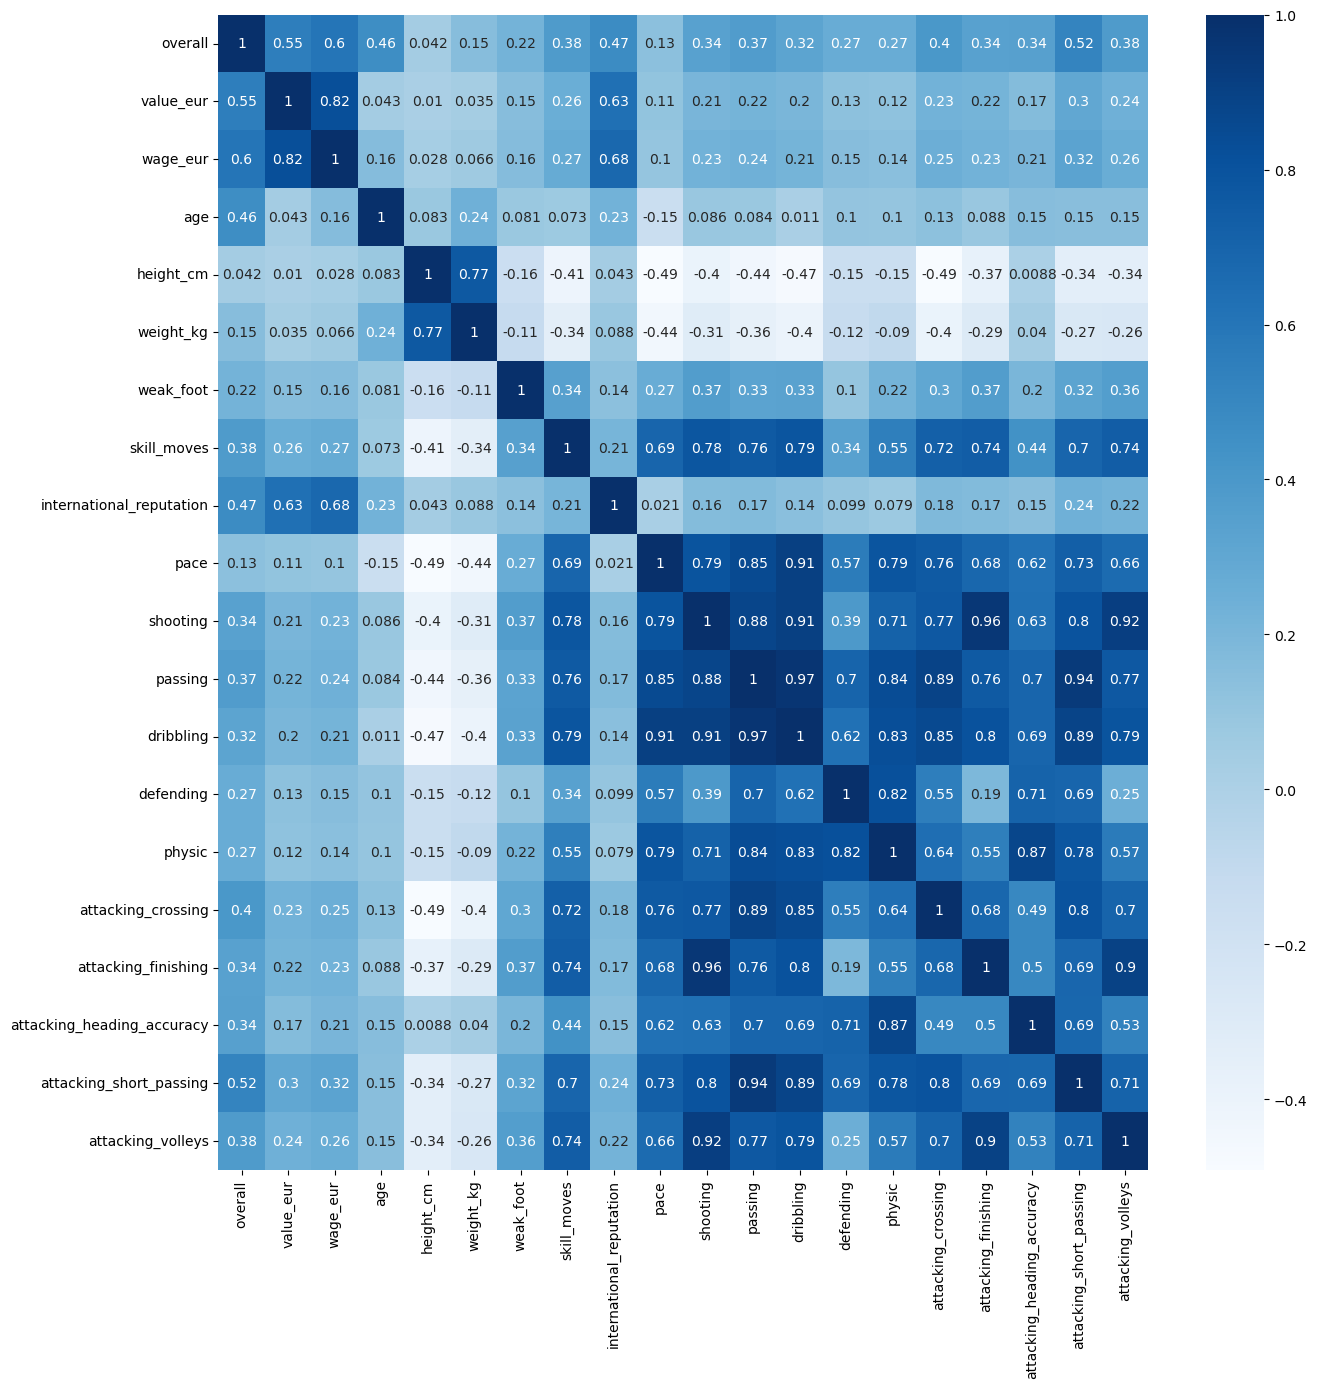

In [16]:
df1 = df.iloc[:, : 23]
df1.head()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df1.corr(), cmap = 'Blues', annot = True);

### Insight:
- Top 5: value_eur(.55), wage_eur(.6), attacking_short_passing(.52), international_reputation(.47), age(.46)

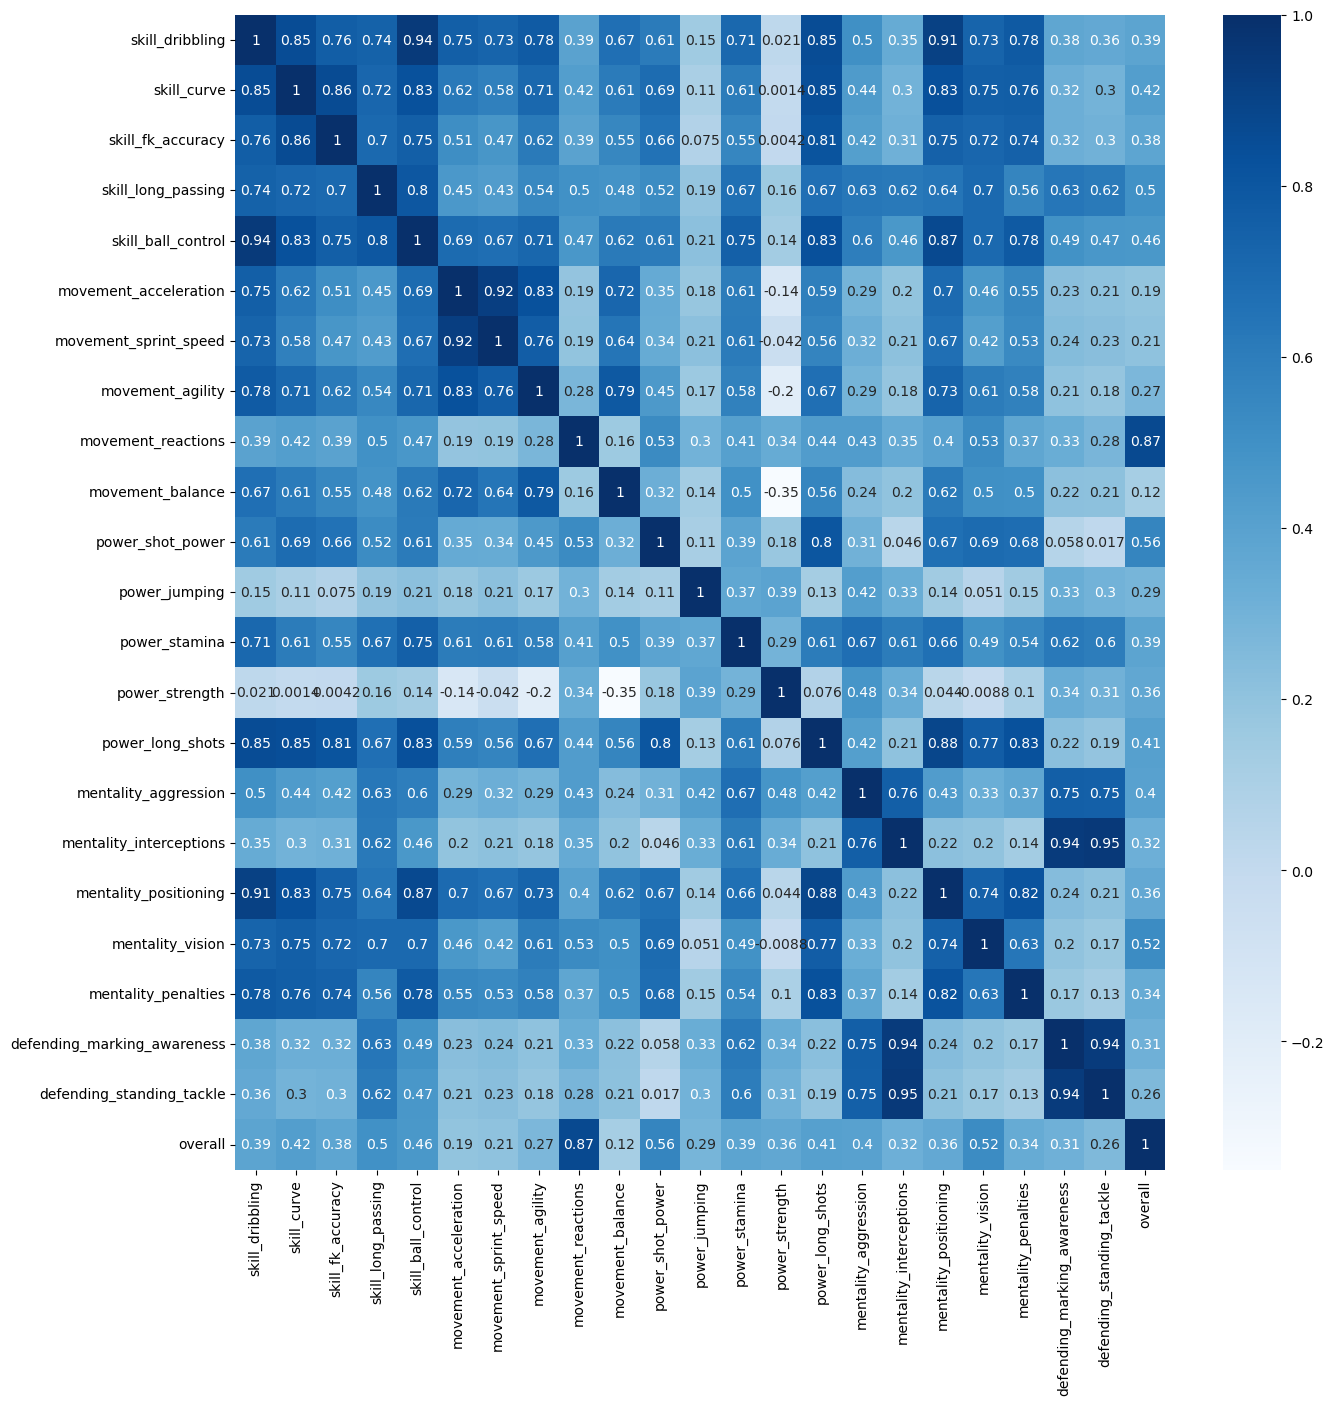

In [17]:
df2 = df.iloc[: , 23:45]
df2['overall'] = df['overall']

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df2.corr(), cmap = 'Blues', annot = True);

### Insight:
- Top 5: movement_reactions(.87), power_shot_power(.56), mentality_vision(.52), skill_long_passing(.5), skill_curve(.42)

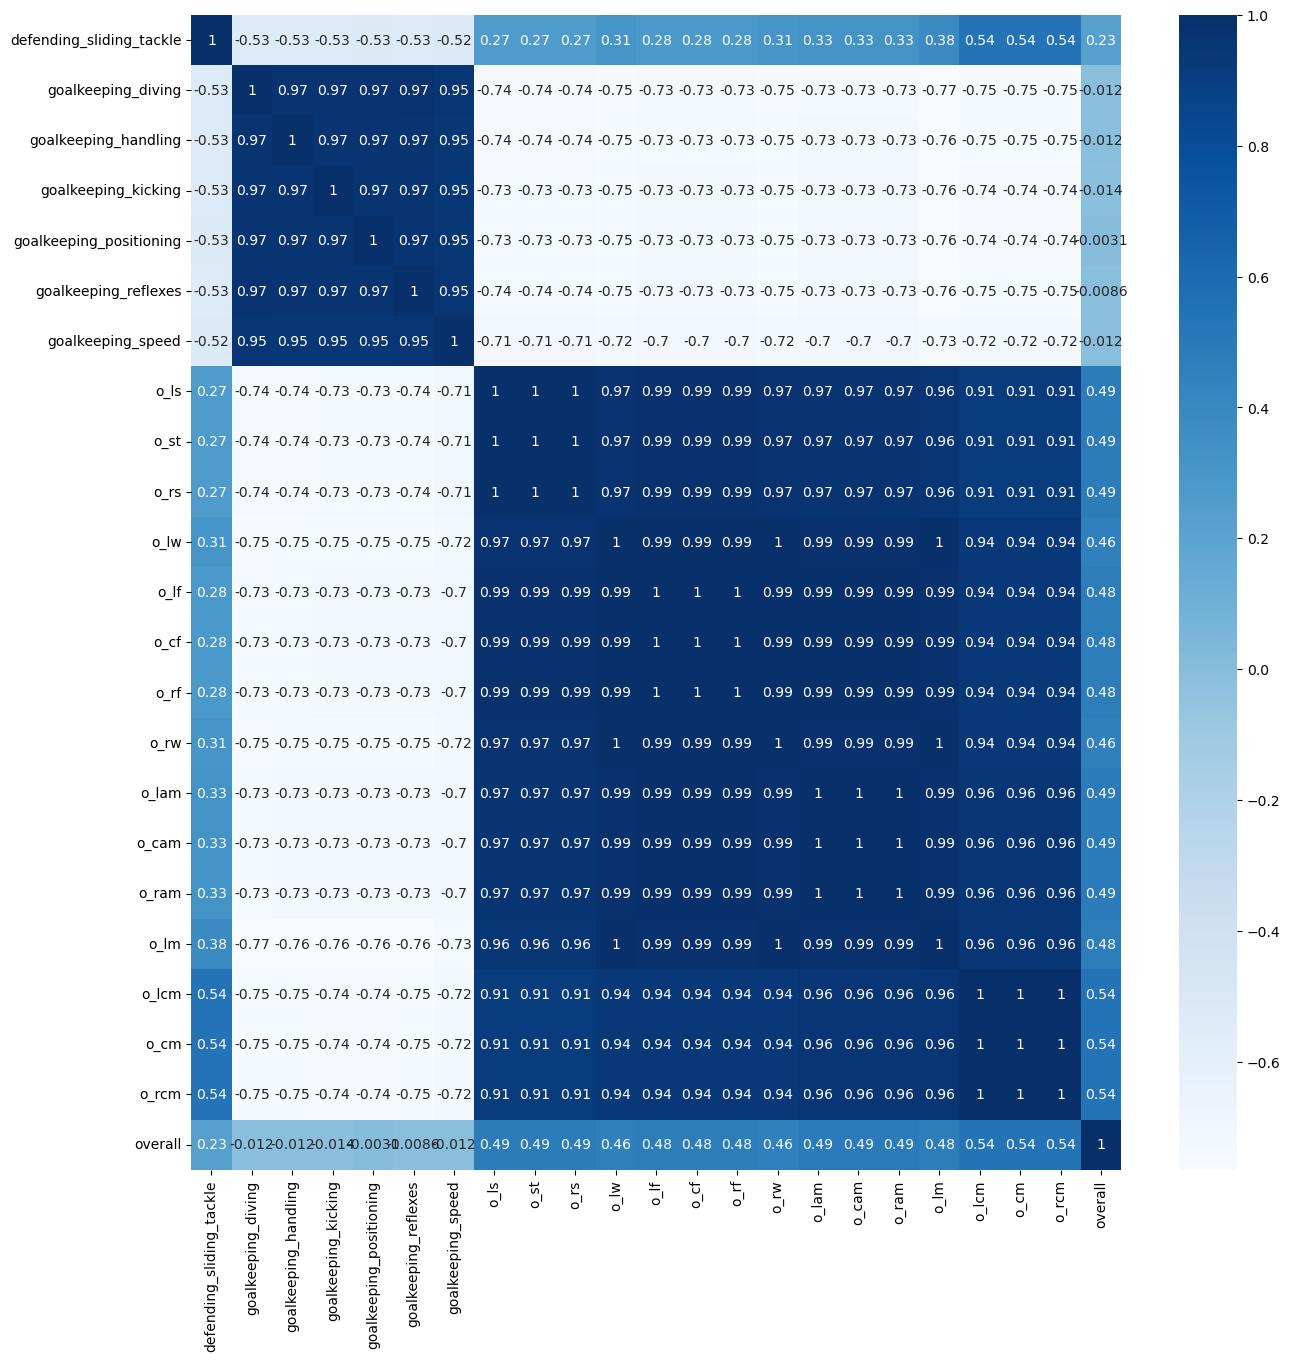

In [18]:
df3 = df.iloc[: , 45:67]
df3['overall'] = df['overall']

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df3.corr(), cmap = 'Blues', annot = True);

### Insight:
- Top 9: o_rcm(.54), o_cm(.54), o_lcm(.54), o_ls, o_st, o_rs, o_lam, o_cam, o_ram(.49)

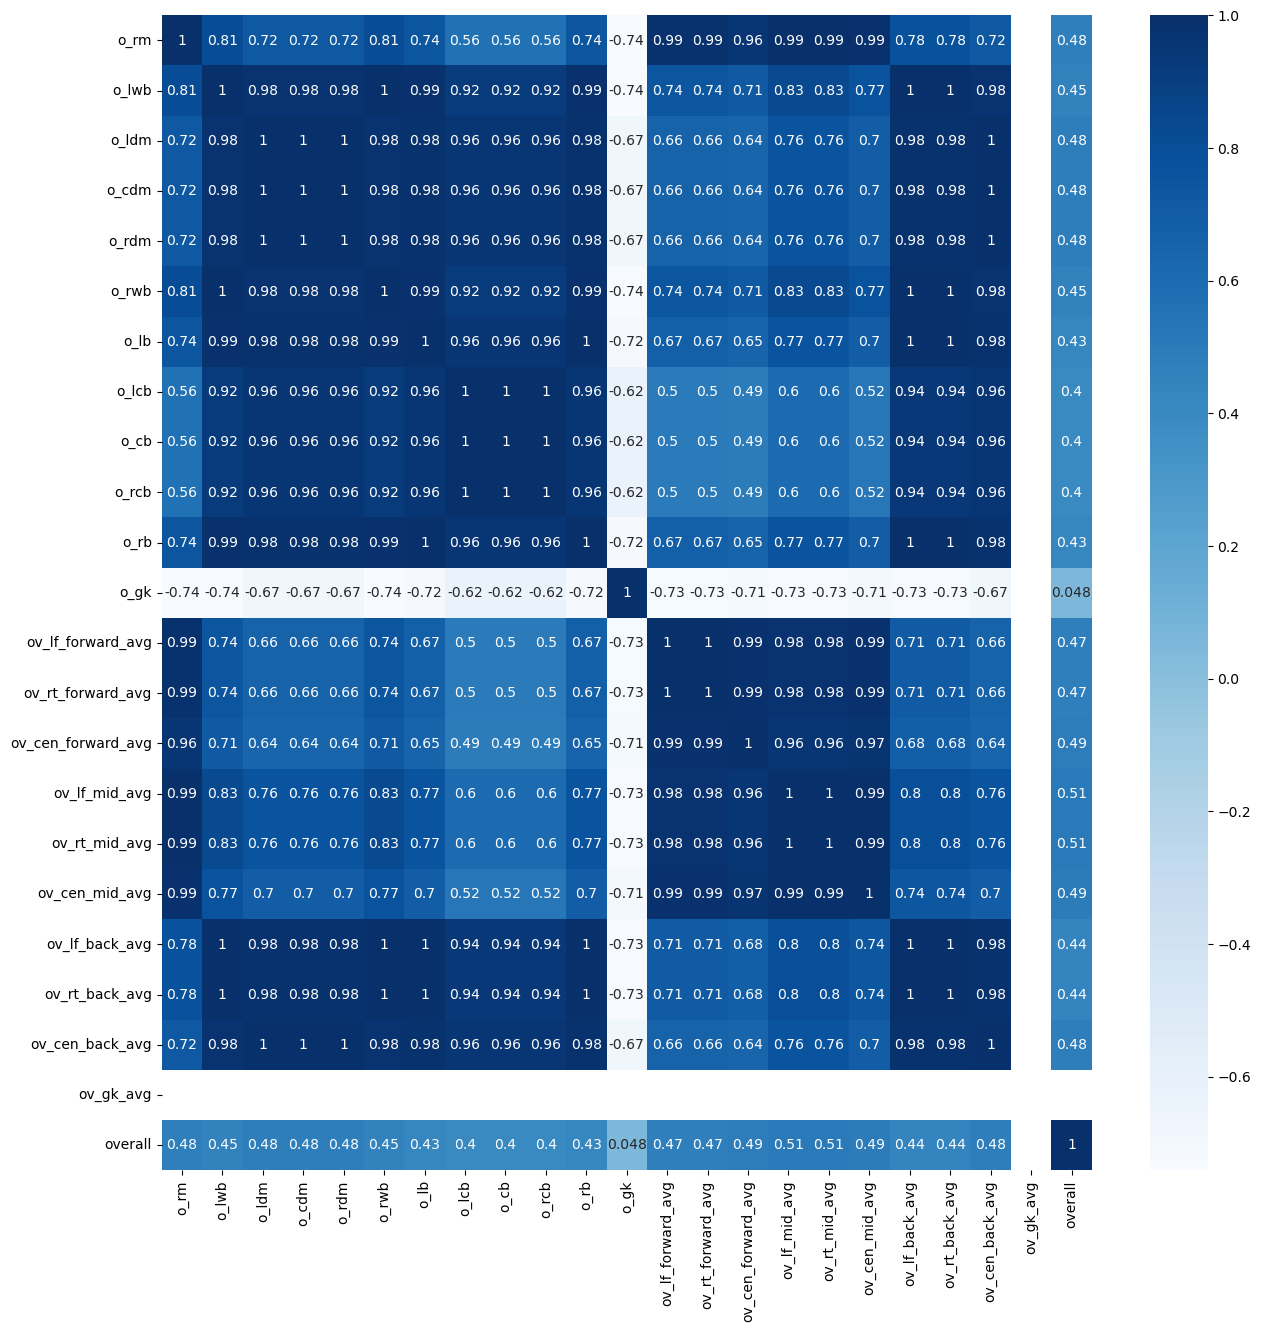

In [19]:
df4 = df.iloc[: , 67:89]
df4['overall'] = df['overall']

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df4.corr(), cmap = 'Blues', annot = True);

### Insight:
- Top 4: ov_lf_mid_avg(.51), ov_rt_mid_avg(.51), ov_cen_forward_avg, ov_cen_mid_avg(.49)

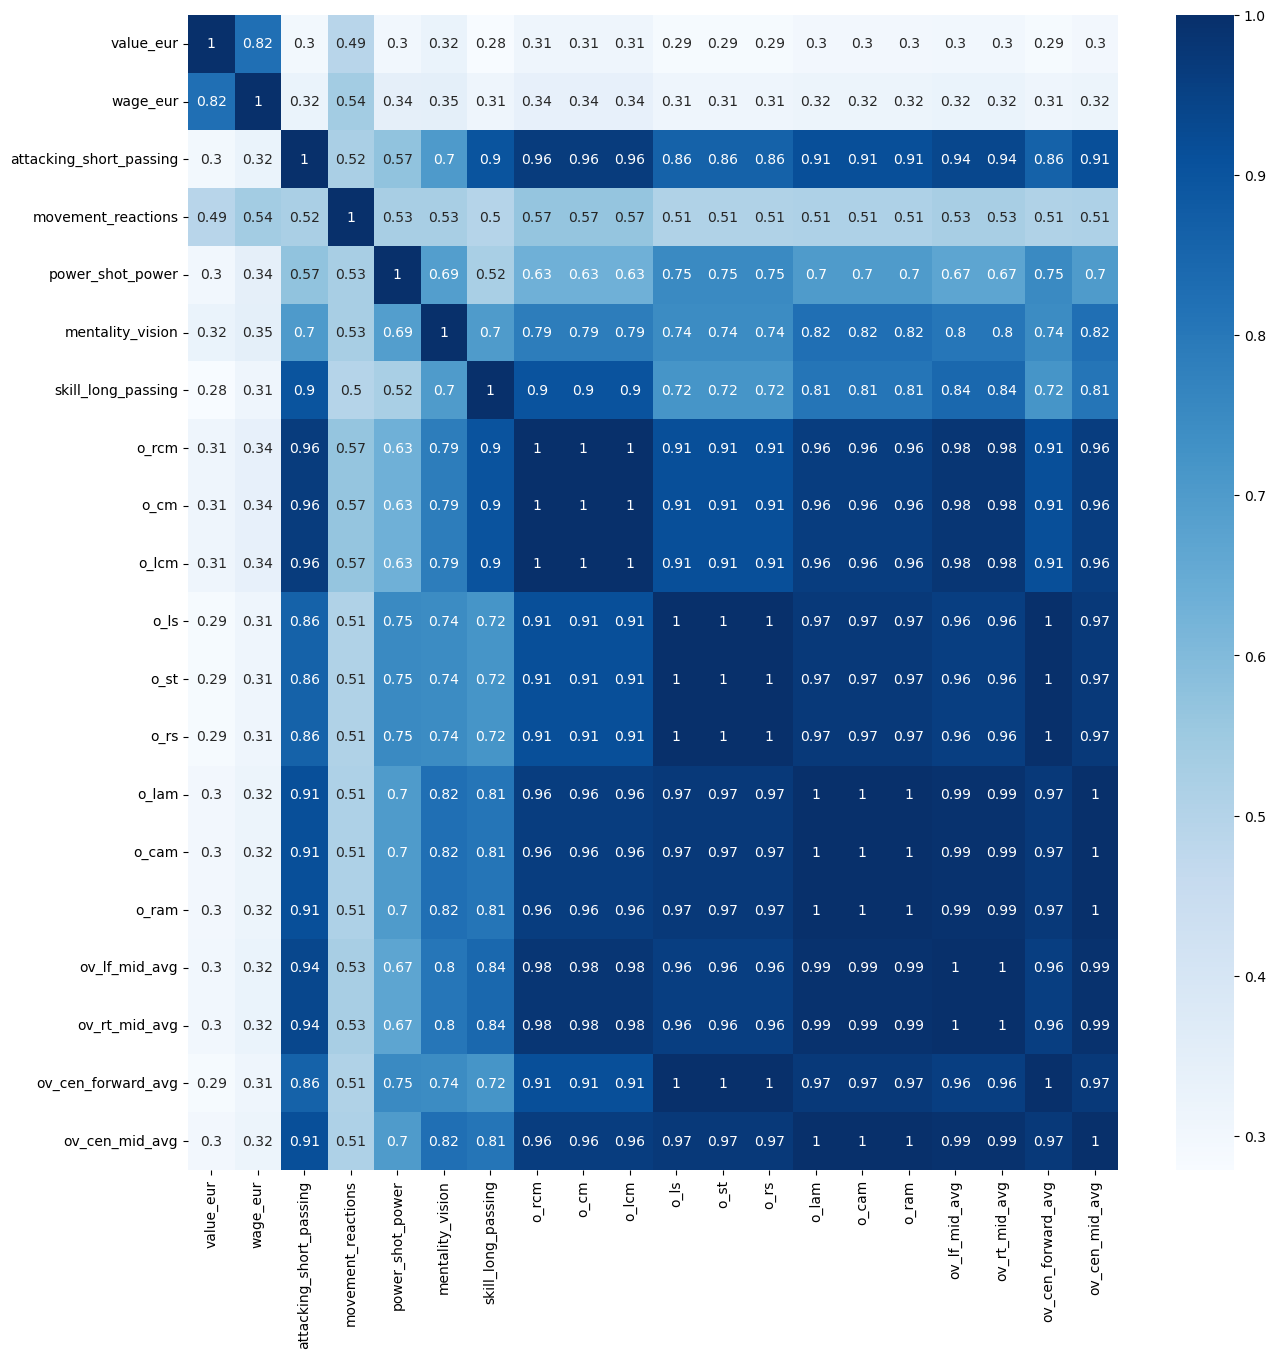

In [29]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(X.corr(), cmap = 'Blues', annot = True);

### Insight:
- Top 20: value_eur(.55), wage_eur(.6), attacking_short_passing(.52), movement_reactions(.87), power_shot_power(.56), mentality_vision(.52), skill_long_passing(.5), o_rcm(.54), o_cm(.54), o_lcm(.54), o_ls, o_st, o_rs, o_lam, o_cam, o_ram(.49), ov_lf_mid_avg(.51), ov_rt_mid_avg(.51), ov_cen_forward_avg, ov_cen_mid_avg(.49)

In [69]:
# Top 20 with target

final_col = df[['overall', 'value_eur', 'wage_eur', 'attacking_short_passing', 'movement_reactions', 
        'power_shot_power', 'mentality_vision', 'skill_long_passing', 
        'o_rcm', 'o_cm', 'o_lcm', 'o_ls', 'o_st', 'o_rs', 'o_lam', 
        'o_cam', 'o_ram', 'ov_lf_mid_avg', 'ov_rt_mid_avg', 'ov_cen_forward_avg',
        'ov_cen_mid_avg']]

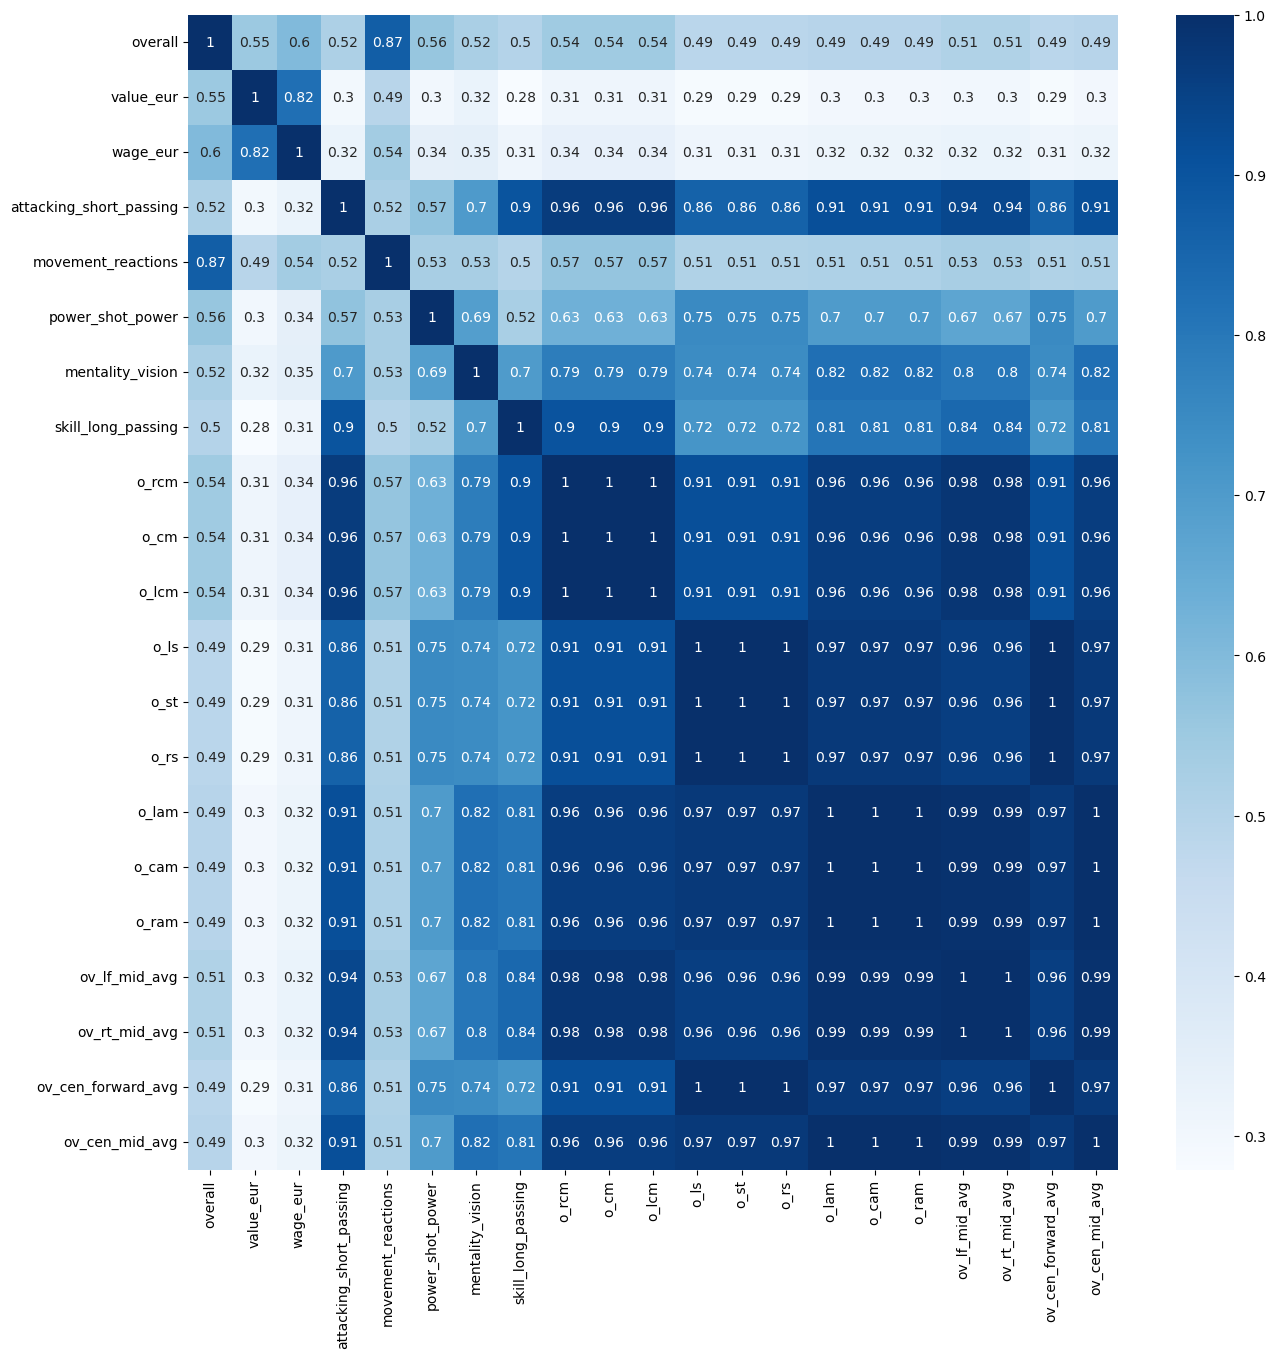

In [68]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(final_col.corr(), cmap = 'Blues', annot = True);

## Change FIFA Overall to Category

- First try at Overall Bins

bins = [0, 60, 70, 80, np.inf]
names = np.array(['bench', 'sub', 'role_player', 'starter'])
df['ov_cat'] = names[np.searchsorted(bins, df['overall'])-1]

- 2nd attempt at Overall Bins

bins = [0, 60, 68, 78, np.inf]
names = np.array(['bench', 'sub', 'role_player', 'starter'])
df['ov_cat'] = names[np.searchsorted(bins, df['overall'])-1]

In [26]:
# Final decision on Overall Bins

bins = [0, 61, 67, 75, np.inf]
names = np.array(['bench', 'sub', 'role_player', 'starter'])
df['ov_cat'] = names[np.searchsorted(bins, df['overall'])-1]

In [27]:
# View of Ov_cat values

df['ov_cat'].value_counts()

sub            6897
role_player    5974
bench          4839
starter        1455
Name: ov_cat, dtype: int64

## Overall Model

### Data Split

In [30]:
# Features and Target and Labels

labels = ['bench', 'sub', 'role_player', 'starter']

X = df[['value_eur', 'wage_eur', 'attacking_short_passing', 'movement_reactions', 
        'power_shot_power', 'mentality_vision', 'skill_long_passing', 
        'o_rcm', 'o_cm', 'o_lcm', 'o_ls', 'o_st', 'o_rs', 'o_lam', 
        'o_cam', 'o_ram', 'ov_lf_mid_avg', 'ov_rt_mid_avg', 'ov_cen_forward_avg',
        'ov_cen_mid_avg']]

y = df['ov_cat']

In [31]:
# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Preprocessing

In [32]:
# One Hot Encode, Scaler

scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

# Selectors

num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

# Tuples

num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [33]:
# Column Transformer

preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1940>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1760>)])

## Model 1 - Logistic Regression

### Default

In [46]:
# Create an instance of the model

from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

# Create a model pipeline

lgbm_pipe = make_pipeline(preprocessor, lgbm)

# Fit the model

lgbm_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1940>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1760>)])),
                ('lgbmclassifier', LGBMClassifier())])

In [47]:
# Save the model's predictions for the train and test dataset

lgbm_train_preds = lgbm_pipe.predict(X_train)
lgbm_test_preds = lgbm_pipe.predict(X_test)

In [48]:
# Two classification reports for Train and Test

print('Train Report')
print(classification_report(y_train, lgbm_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, lgbm_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

       bench       0.97      0.98      0.97      3673
         sub       0.98      0.97      0.98      4494
 role_player       1.00      1.00      1.00      1095
     starter       0.96      0.96      0.96      5111

    accuracy                           0.97     14373
   macro avg       0.98      0.98      0.98     14373
weighted avg       0.97      0.97      0.97     14373

Test Report
              precision    recall  f1-score   support

       bench       0.89      0.93      0.91      1166
         sub       0.91      0.91      0.91      1480
 role_player       0.96      0.88      0.92       360
     starter       0.88      0.87      0.88      1786

    accuracy                           0.90      4792
   macro avg       0.91      0.90      0.90      4792
weighted avg       0.90      0.90      0.90      4792



### Tuning

In [49]:
# Looking at params to see tuning options

lgbm_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1940>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore'),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1760>)])),
  ('lgbmclassifier', LGBMClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1940>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1760>)

In [56]:
# Parameter grid

params = {
    'lgbmclassifier__n_estimators' : [10, 100, 500, 1000], 
    'lgbmclassifier__max_depth' : range(-1,5)}

In [57]:
# Create GridSearch Pipeline to find best params

lgbm_pipe_gs = GridSearchCV(lgbm_pipe, params)

lgbm_pipe_gs.fit(X_train, y_train)

lgbm_pipe_gs.best_params_

{'lgbmclassifier__max_depth': 3, 'lgbmclassifier__n_estimators': 1000}

In [58]:
# Create Best Logistic Regression

best_lgbm = LGBMClassifier(max_depth = 3, n_estimators= 1000)

best_lgbm_pipe = make_pipeline(preprocessor, best_lgbm)

best_lgbm_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1940>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1760>)])),
                ('lgbmclassifier',
                 LGBMClassifier(max_depth=3, n_estimators=1000))])

In [59]:
# Best Predictions

best_lgbm_train_preds = best_lgbm_pipe.predict(X_train)
best_lgbm_test_preds = best_lgbm_pipe.predict(X_test)

In [60]:
# Two classification reports for Train and Test with best params 
print('Train Report')
print(classification_report(y_train, best_lgbm_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, best_lgbm_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

       bench       0.98      0.99      0.99      3673
         sub       0.99      0.98      0.98      4494
 role_player       1.00      1.00      1.00      1095
     starter       0.97      0.98      0.98      5111

    accuracy                           0.98     14373
   macro avg       0.99      0.99      0.99     14373
weighted avg       0.98      0.98      0.98     14373

Test Report
              precision    recall  f1-score   support

       bench       0.89      0.93      0.91      1166
         sub       0.90      0.91      0.90      1480
 role_player       0.95      0.88      0.92       360
     starter       0.88      0.87      0.88      1786

    accuracy                           0.90      4792
   macro avg       0.91      0.90      0.90      4792
weighted avg       0.90      0.90      0.90      4792



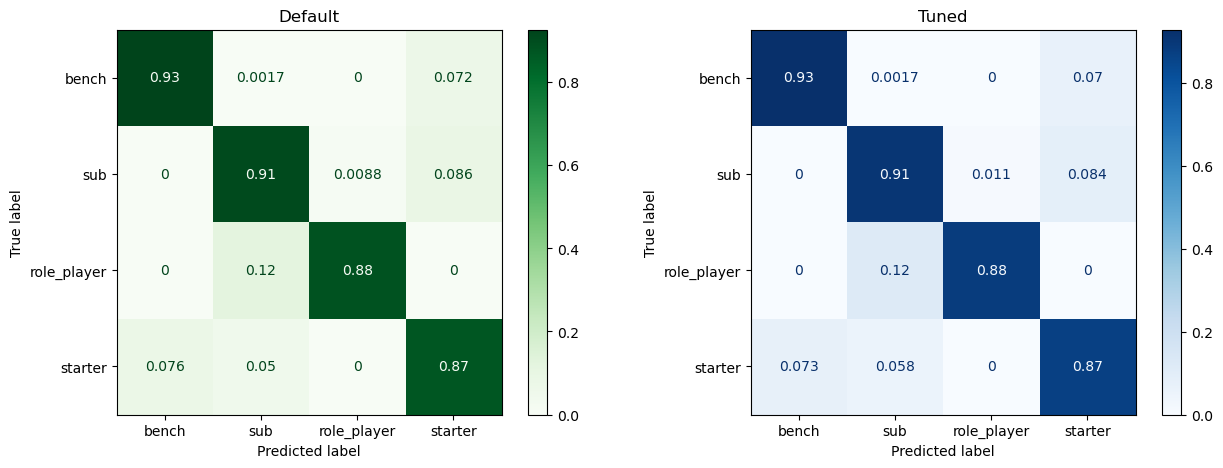

In [61]:
# Plot confusion matrices for both default and a tuning params

fig, axes = plt.subplots(1,2, figsize=(15,5));

# Confusion Matrix for default model
ConfusionMatrixDisplay.from_predictions(y_test, lgbm_test_preds, 
               normalize='true', display_labels=labels,  cmap='Greens',              
               ax=axes[0]);
axes[0].set_title('Default');

# Confusion Matrix for tuning model
ConfusionMatrixDisplay.from_predictions(y_test, best_lgbm_test_preds, 
               normalize='true', display_labels=labels,  cmap='Blues',
               ax=axes[1]);
axes[1].set_title('Tuned');

### Insight:
- The tuned was the same in terms of Accuracy which is what I am most focused on. So the params that I did change did not help.

- With more time, would like to try to find better params to make slightly better. 

## Model 2 - Random Forest Classifier

### Default

In [35]:
# Create an instance of the model

rf_tree = RandomForestClassifier()

# Create a model pipeline

rf_tree_pipe = make_pipeline(preprocessor, rf_tree)

# Fit the model

rf_tree_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1940>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1760>)])),
                ('randomforestclassifier', RandomForestClassifier())])

In [36]:
# Predictions

rf_tree_train_preds = rf_tree_pipe.predict(X_train)
rf_tree_test_preds = rf_tree_pipe.predict(X_test)

In [37]:
# Two classification reports for Train and Test

print('Train Report')
print(classification_report(y_train, rf_tree_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, rf_tree_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

       bench       1.00      1.00      1.00      3673
         sub       1.00      1.00      1.00      4494
 role_player       1.00      1.00      1.00      1095
     starter       1.00      1.00      1.00      5111

    accuracy                           1.00     14373
   macro avg       1.00      1.00      1.00     14373
weighted avg       1.00      1.00      1.00     14373

Test Report
              precision    recall  f1-score   support

       bench       0.89      0.92      0.90      1166
         sub       0.91      0.90      0.90      1480
 role_player       0.96      0.88      0.92       360
     starter       0.87      0.87      0.87      1786

    accuracy                           0.89      4792
   macro avg       0.91      0.89      0.90      4792
weighted avg       0.89      0.89      0.89      4792



### Tuning

In [38]:
# Looking at params to see tuning options

rf_tree_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1940>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore'),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1760>)])),
  ('randomforestclassifier', RandomForestClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1940>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  <sklearn.compose._column_transformer.make_column_selector object 

In [40]:
# Set the params

rf_tree_params = {'randomforestclassifier__max_features': ['sqrt', 'log2'], 
                   'randomforestclassifier__n_estimators': range(5,20),
                 'randomforestclassifier__max_depth': range(3,10)}

In [41]:
# Find the best params

rf_tree_gs = GridSearchCV(rf_tree_pipe, rf_tree_params)
rf_tree_gs.fit(X_train, y_train)
rf_tree_gs.best_params_

{'randomforestclassifier__max_depth': 9,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__n_estimators': 14}

In [42]:
# Create an instance of the best model

best_rf_tree = RandomForestClassifier(max_features = 'sqrt', n_estimators = 14 , max_depth = 9)

best_rf_tree_pipe = make_pipeline(preprocessor, rf_tree)

best_rf_tree_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1940>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15e7c1760>)])),
                ('randomforestclassifier', RandomForestClassifier())])

In [43]:
# Best Predictions

best_rf_tree_train_preds = best_rf_tree_pipe.predict(X_train)
best_rf_tree_test_preds = best_rf_tree_pipe.predict(X_test)

In [44]:
# Two classification reports for Train and Test with best params 

print('Train Report')
print(classification_report(y_train, best_rf_tree_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, best_rf_tree_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

       bench       1.00      1.00      1.00      3673
         sub       1.00      1.00      1.00      4494
 role_player       1.00      1.00      1.00      1095
     starter       1.00      1.00      1.00      5111

    accuracy                           1.00     14373
   macro avg       1.00      1.00      1.00     14373
weighted avg       1.00      1.00      1.00     14373

Test Report
              precision    recall  f1-score   support

       bench       0.88      0.92      0.90      1166
         sub       0.90      0.90      0.90      1480
 role_player       0.97      0.87      0.92       360
     starter       0.87      0.86      0.87      1786

    accuracy                           0.89      4792
   macro avg       0.91      0.89      0.90      4792
weighted avg       0.89      0.89      0.89      4792



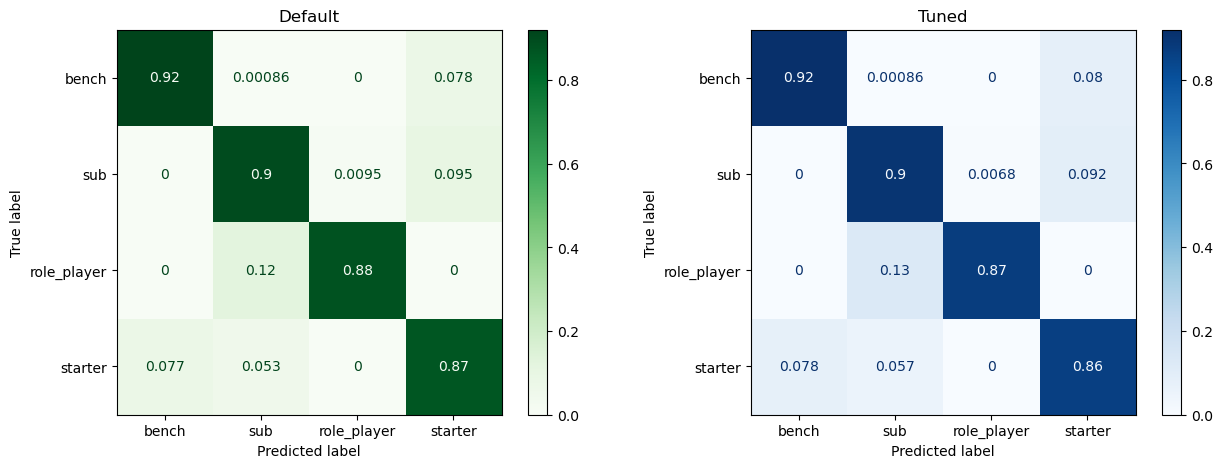

In [45]:
# Plot confusion matrices for both default and a tuning params

fig, axes = plt.subplots(1,2, figsize=(15,5));

# Confusion Matrix for default model

ConfusionMatrixDisplay.from_predictions(y_test, rf_tree_test_preds, 
               normalize='true', display_labels=labels,  cmap='Greens',              
               ax=axes[0]);
axes[0].set_title('Default');

# Confusion Matrix for tuning model

ConfusionMatrixDisplay.from_predictions(y_test, best_rf_tree_test_preds, 
               normalize='true', display_labels=labels,  cmap='Blues',
               ax=axes[1]);
axes[1].set_title('Tuned');

### Insight:
- The default model is slightly better in the role_player and starter.

## Final Results

In [62]:
# The two final test results for both models in classification report

print('Test Report')
print(classification_report(y_test, best_lgbm_test_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, best_rf_tree_test_preds, target_names=labels))

Test Report
              precision    recall  f1-score   support

       bench       0.89      0.93      0.91      1166
         sub       0.90      0.91      0.90      1480
 role_player       0.95      0.88      0.92       360
     starter       0.88      0.87      0.88      1786

    accuracy                           0.90      4792
   macro avg       0.91      0.90      0.90      4792
weighted avg       0.90      0.90      0.90      4792

Test Report
              precision    recall  f1-score   support

       bench       0.88      0.92      0.90      1166
         sub       0.90      0.90      0.90      1480
 role_player       0.97      0.87      0.92       360
     starter       0.87      0.86      0.87      1786

    accuracy                           0.89      4792
   macro avg       0.91      0.89      0.90      4792
weighted avg       0.89      0.89      0.89      4792



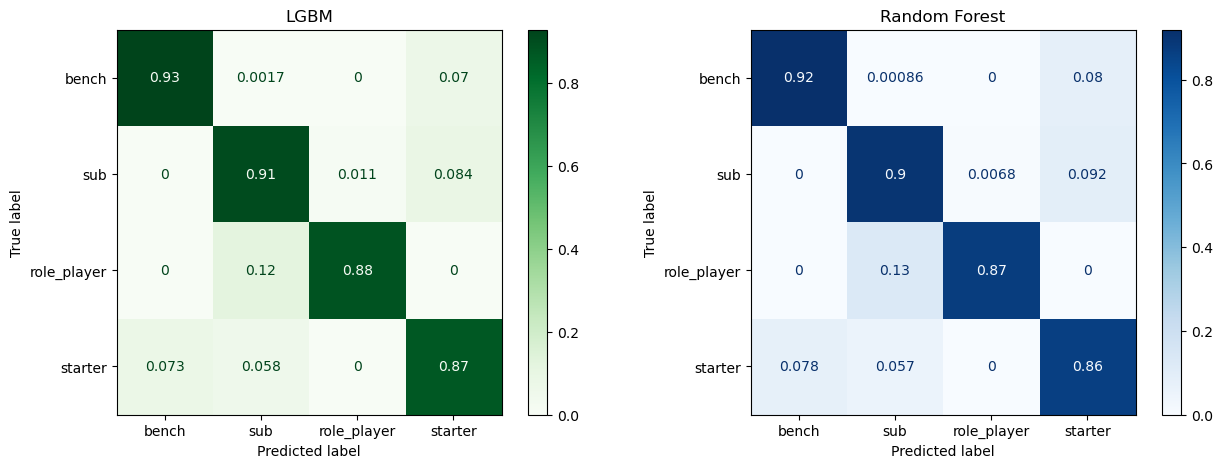

In [65]:
# Plot confusion matrices for both models

fig, axes = plt.subplots(1,2, figsize=(15,5));

# Confusion Matrix for best Logistic Regression model

ConfusionMatrixDisplay.from_predictions(y_test, best_lgbm_test_preds, 
               normalize='true', display_labels=labels,  cmap='Greens',              
               ax=axes[0]);
axes[0].set_title('LGBM');

# Confusion Matrix for best Random Forest model

ConfusionMatrixDisplay.from_predictions(y_test, best_rf_tree_test_preds, 
               normalize='true', display_labels=labels,  cmap='Blues',
               ax=axes[1]);
axes[1].set_title('Random Forest');

### Insight:
- The LGBM model is better in the accuracy for all 4 categories.

- This is most important which trying to predict a players Overall rating.

## Summary:
- I would use the LGBM model to help pick out players. It is 87% and above on any type of player, and being able to predict players ability is very important to building a team.
- I would also look for players that have very natural movement to the game. This statistic has the highest correlation on being a higher rated player.